In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (!code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите, чтобы показать/скрыть код"></form>''')

# Постановка задачи.

Точка единичной массы совершает колебания в плоскости $(𝑞1, 𝑞2)$ под действием силы, определяемой потенциальной энергией вида
\begin{equation}
    \Pi = \frac1{2}(5 q_1^2 - 8 q_1 q_2 + 5 q_2^2).
\end{equation}

Найти частоты колебаний, выписать общее решение уравнений движения и матрицу перехода к нормальным координатам. Нарисовать в плоскости $(𝑞1, 𝑞2)$ траекторию, удовлетворяющую при
$𝑡 = 0$ начальным условиям
\begin{equation}
    q_1(0) = 1,\ q_2(0) = 0,\ \dot q_1(0) = 0,\ \dot q_2(0) = 0.
\end{equation}


# Решение.

Кинетическая энергия точки единичной массы записывается как
\begin{equation}
    T = \frac{1}{2} \left(\dot q_1^2 + \dot q_2^2 \right).
\end{equation}

Тогда матрицы вторых производных кинетической и потенциальной энергии:
\begin{equation}
    A = \begin{Vmatrix} 1 & 0 \\ 0 & 1 \end{Vmatrix},\ 
    C = \begin{Vmatrix} 5 & -4 \\ -4 & 5 \end{Vmatrix}\text{.}
\end{equation}

Тогда характеристический многочлен получается из соотношения
\begin{equation}
    |\Lambda| = |C - \lambda A| = \begin{vmatrix} 5 - \lambda & -4 \\ -4 & 5 - \lambda \end{vmatrix} = 
    (\lambda - 9)(\lambda - 1) = 0\text{.}
\end{equation}

Отсюда находим собственные частоты и векторы:
\begin{align}
    \lambda_1 &= 9 \Rightarrow \Lambda_1 = \begin{Vmatrix} -4 & -4 \\ -4 & -4 \end{Vmatrix}
    \Rightarrow \vec u_1 = \begin{pmatrix} 1 \\ -1 \end{pmatrix},\ \omega_1 = 3\text{,}\\
    \lambda_2 &= 1 \Rightarrow \Lambda_2 = \begin{Vmatrix} 4 & -4 \\ -4 & 4 \end{Vmatrix}
    \Rightarrow \vec u_2 = \begin{pmatrix} 1 \\ 1 \end{pmatrix},\ \omega_2 = 1\text{.}
\end{align}

Тогда общее решение записывается в виде
\begin{equation}
    q(t) = \begin{pmatrix} 1 \\ -1 \end{pmatrix}A_1 \sin(3t + \alpha_1) +
    \begin{pmatrix} 1 \\ 1 \end{pmatrix}A_2 \sin(t + \alpha_2).
\end{equation}

Из собственных векторов получаем ненормированную матрицу перехода к нормальным координатам:
\begin{equation}
    U = \begin{Vmatrix} 1 & 1 \\ -1 & 1 \end{Vmatrix}\text{.}
\end{equation}

Найдём амплитудные значения и собственные векторы кодом. Подключаем вычислительные библиотеки:

In [0]:
import numpy as np
from scipy import linalg

Найдём собственные векторы. Поскольку матрица производных кинетической энергии оказалась равна единичной, можно воспользоваться стандартными встроенными методами для нахождения собственных значений и векторов.

In [0]:
C = np.mat('[5 -4 ; -4 5]')
lambdas, U = np.linalg.eig(C)
print('Собственные значения: ', lambdas)
print('Матрица перехода к нормальным координатам:\n', U)

Собственные значения:  [9. 1.]
Матрица перехода к нормальным координатам:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Собственные векторы находим как столбцы матрицы $U$.

In [0]:
u1 = ((U.T)[0]).T
u2 = ((U.T)[1]).T
print('Собственные векторы:')
print()
print('u1 = \n', u1)
print()
print('u2 = \n', u2)

Собственные векторы:

u1 = 
 [[ 0.70710678]
 [-0.70710678]]

u2 = 
 [[0.70710678]
 [0.70710678]]


# Визуализация.

Подключаем необходимые библиотеки:

In [0]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

График потенциальной энергии!:

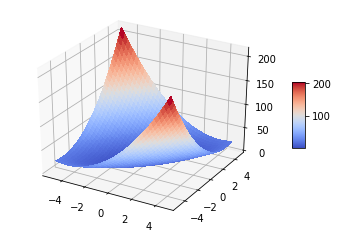

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')

q1 = np.arange(-5, 5, 0.25)
q2 = np.arange(-5, 5, 0.25)
q1, q2 = np.meshgrid(q1, q2)
Z = (5 * q1 ** 2 - 8 * q1 * q2 + 5 * q2 ** 2) / 2;

surf = ax.plot_surface(q1, q2, Z, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.3, aspect=5)

plt.show()

Траектория общего движения (один из частных случаев):

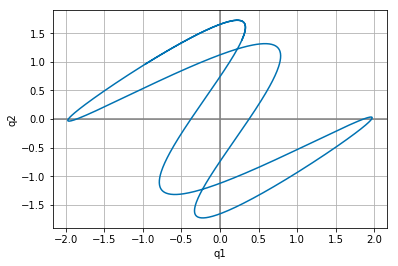

In [0]:
A1 = 1;
alph1 = 0;
A2 = 1;
alph2 = -1.3;

t = np.linspace(0, 7, 1000)
q1 = A1 * np.sin(3 * t + alph1) + A2 * np.sin(t + alph2)
q2 = A1 * np.sin(3 * t + alph1) - A2 * np.sin(t + alph2)

ax = plt.axes()
ax.set_xlabel('q1')
ax.set_ylabel('q2')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')

plt.plot(q1, q2, '-');
plt.grid(True)
plt.show()

Найдём частное решение, удовлетворяющее начальным условиям. В общем виде движение точки описывается уравнениями:
\begin{align}
    q_1 &= A_1 \sin(3t + \alpha_1) + A_2 \sin(t + \alpha_2),\\
    q_2 &= A_1 \sin(3t + \alpha_1) - A_2 \sin(t + \alpha_2),\\
    \dot q_1 &= 3 A_1 \cos(3t + \alpha_1) + A_2 \cos(t + \alpha_2),\\
    \dot q_2 &= 3 A_1 \cos(3t + \alpha_1) - A_2 \cos(t + \alpha_2).   
\end{align}

Тогда с учётом начальных условий получаем следующее:
\begin{align}
    \left.
    \begin{aligned}
        A_1 \sin \alpha_1 + A_2 \sin \alpha_2 &= 1 \\
        A_1 \sin \alpha_1 - A_2 \sin \alpha_2 &= 0
    \end{aligned}
    \right |
    &\Rightarrow A_1 \sin \alpha_1 = A_2 \sin \alpha_2 = \frac1{2} \\
    \left.
    \begin{aligned}
        3 A_1 \cos \alpha_1 + A_2 \cos \alpha_2 = 0 \\
        3 A_1 \cos \alpha_1 - A_2 \cos \alpha_2 = 0
    \end{aligned}
    \right |
    &\Rightarrow A_1 \cos \alpha_1 = A_2 \cos \alpha_2 = 0.
\end{align}

Из второго следствия получаем, что $\cos \alpha_1 = \cos \alpha_2 = 0$. Тогда из первого следствия получаем, что $A \sin (x + \alpha) = A \sin x \cos \alpha + A \cos x \sin \alpha = \frac1{2}\cos x$, и отсюда находим, что частное решение
\begin{align}
    \Biggl. q(t) \Biggr |_\text{н.у.} &=
    \begin{pmatrix} 1 \\ -1 \end{pmatrix} \cdot \frac1{2} \cos 3t +
    \begin{pmatrix} 1 \\ 1 \end{pmatrix} \cdot \frac1{2} \cos t = \\
    &= \begin{pmatrix} \cos t \cos 2t \\ \sin t \sin 2t \end{pmatrix}.
\end{align}

Визуализация искомого частного решения:

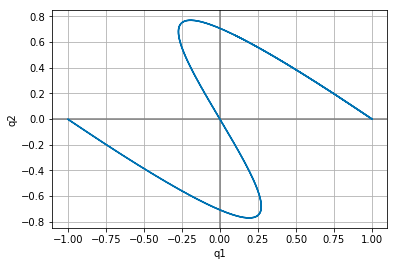

In [0]:
t = np.linspace(0, 7, 1000)
q1 = np.cos(t) * np.cos(2 * t)
q2 = np.sin(t) * np.sin(2 * t)

ax = plt.axes()
ax.set_xlabel('q1')
ax.set_ylabel('q2')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')

plt.plot(q1, q2, '-');
plt.grid(True)
plt.show()

# Анимация

Подключаем необходимые библиотеки

In [0]:
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
from IPython.display import HTML

Создаём координатное пространство

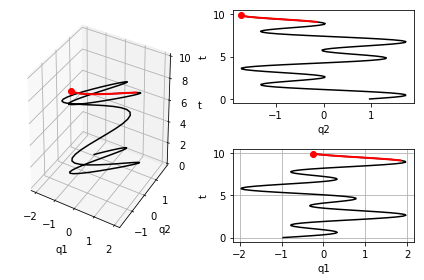

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1,projection="3d")
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

t = np.linspace(0, 10, 100)
q1 = A1 * np.sin(3 * t + alph1) + A2 * np.sin(t + alph2)
q2 = A1 * np.sin(3 * t + alph1) - A2 * np.sin(t + alph2)

plt.grid(True)

ax1.set_xlabel('q1')
ax1.set_ylabel('q2')
ax1.set_zlabel('t')
ax1.set_zlim(0, 10)

ax2.set_xlabel('q2')
ax2.set_ylabel('t')

ax3.set_xlabel('q1')
ax3.set_ylabel('t')

plt.grid(True)

lines = []
for i in range(len(t)):
    head = i - 1
    head_slice = (t > t[i] - 1.0) & (t < t[i])
    
    line1,  = ax1.plot(q1[:i], q2[:i], t[:i],
                       color='black')
    line1a, = ax1.plot(q1[head_slice], q2[head_slice], t[head_slice],
                       color='red', linewidth=2)
    line1e, = ax1.plot([q1[head]], [q2[head]], [t[head]],
                       color='red', marker='o', markeredgecolor='r')
    line2,  = ax2.plot(q2[:i], t[:i],
                       color='black')
    line2a, = ax2.plot(q2[head_slice], t[head_slice],
                       color='red', linewidth=2)
    line2e, = ax2.plot(q2[head], t[head],
                       color='red', marker='o', markeredgecolor='r')
    line3,  = ax3.plot(q1[:i], t[:i],
                       color='black')
    line3a, = ax3.plot(q1[head_slice], t[head_slice],
                       color='red', linewidth=2)
    line3e, = ax3.plot(q1[head], t[head],
                       color='red', marker='o', markeredgecolor='r')
    lines.append([line1,line1a,line1e,line2,line2a,line2e,line3,line3a,line3e])

plt.grid(True)
plt.tight_layout()
ani = animation.ArtistAnimation(fig, lines, interval=50, blit=True)

fn = 'line_animation_3d_with_two_2d_artistanimation'
ani.save('%s.gif'%(fn), writer='pillow',fps=1000/50)

plt.rcParams['animation.html'] = 'html5'
plt.grid(True)
ani

Тогда фазовые траектории выглядят так:

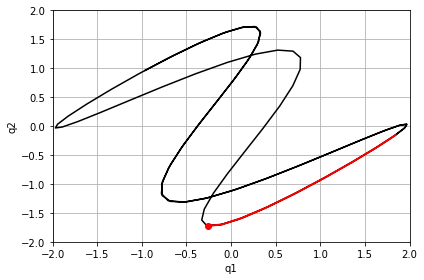

In [0]:
fig2 = plt.figure()

# ax4 = fig2.add_subplot(1, 1, 1)
ax4 = plt.axes()

ax4.set_xlabel('q1')
ax4.set_ylabel('q2')
ax4.set_xlim(-A1 - A2, A1 + A2)
ax4.set_ylim(-A1 - A2, A1 + A2)

t = np.linspace(0, 10, 100)
q1 = A1 * np.sin(3 * t + alph1) + A2 * np.sin(t + alph2)
q2 = A1 * np.sin(3 * t + alph1) - A2 * np.sin(t + alph2)

lines = []
for i in range(len(t)):
    head = i - 1
    head_slice = (t > t[i] - 1.0) & (t < t[i])
    line4,  = ax4.plot(q1[:i], q2[:i],
                       color='black')
    line4a, = ax4.plot(q1[head_slice], q2[head_slice],
                       color='red', linewidth=2)
    line4e, = ax4.plot(q1[head], q2[head],
                       color='red', marker='o', markeredgecolor='r')
    lines.append([line4,line4a,line4e])
    
plt.tight_layout()
ani2 = animation.ArtistAnimation(fig2, lines, interval=50, blit=True)

fn2 = 'phasal_trajectory_animation'
ani2.save('%s.gif'%(fn2), writer='pillow',fps=1000/50)

plt.rcParams['animation.html'] = 'html5'
plt.grid(True)
ani2


А частное решение так:

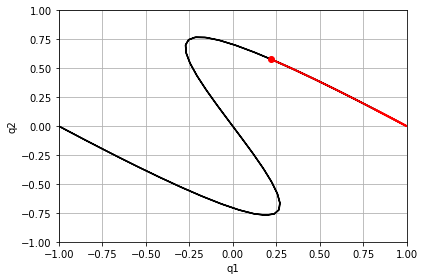

In [0]:
fig3 = plt.figure()

ax5 = fig3.add_subplot(1, 1, 1)

ax5.set_xlabel('q1')
ax5.set_ylabel('q2')
ax5.set_xlim(-1, 1)
ax5.set_ylim(-1, 1)

t = np.linspace(0, 7, 100)
q1 = np.cos(t) * np.cos(2 * t)
q2 = np.sin(t) * np.sin(2 * t)

lines = []
for i in range(len(t)):
    head = i - 1
    head_slice = (t > t[i] - 1.0) & (t < t[i])
    line5,  = ax5.plot(q1[:i], q2[:i],
                       color='black')
    line5a, = ax5.plot(q1[head_slice], q2[head_slice],
                       color='red', linewidth=2)
    line5e, = ax5.plot(q1[head], q2[head],
                       color='red', marker='o', markeredgecolor='r')
    lines.append([line5,line5a,line5e])
    
plt.tight_layout()
ani3 = animation.ArtistAnimation(fig3, lines, interval=50, blit=True)

fn3 = 'phasal_trajectory_animation'
ani3.save('%s.gif'%(fn3), writer='pillow',fps=1000/50)

plt.rcParams['animation.html'] = 'html5'
plt.grid(True)
ani3